In [1]:
import sys
import os
sys.path.append('./pycococreator-0.2.0/pycococreatortools')
from pycococreatortools import *
from PIL import Image
import numpy as np
from numpy import asarray
import PIL.ImageOps  
from skimage import data
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.color import label2rgb

In [212]:
#nombre = './IMG/Welding/P0001/masks/P0001_0010_0.png' 
nombre = './IMG/Welding/J0001/masks/J0001_0009_0.png'
image = Image.open(nombre)
# convert image to numpy array
data = asarray(image.convert("L"))
data = np.where(data > 128, 255, 0)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
#image2 = PIL.ImageOps.invert(image2)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(570, 736)
<class 'PIL.Image.Image'>
I
(736, 570)


In [213]:
np.count_nonzero(data != 0)

2003

In [214]:
np.unique(data)

array([  0, 255])

In [215]:
print(data) #

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


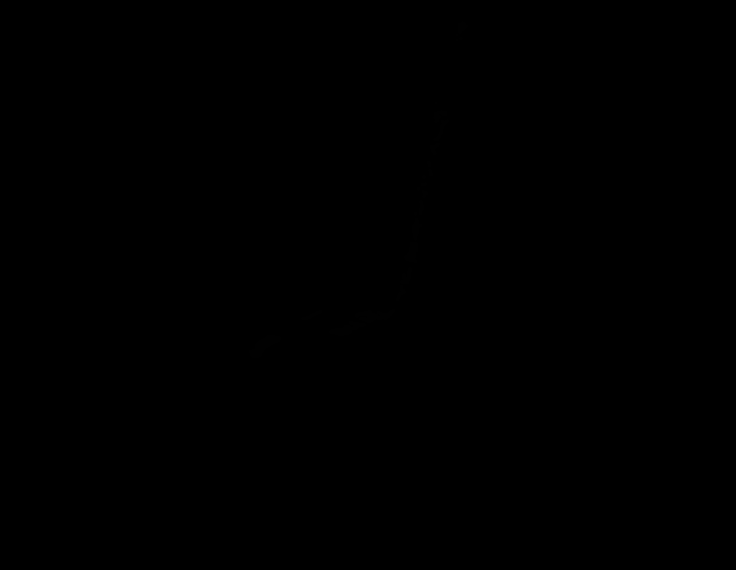

In [216]:
image2

In [217]:
fondo = np.zeros_like(data)
defectos = label(data)
props = regionprops(defectos)
print('Longitud de props', len(props))

Longitud de props 24


In [218]:
np.count_nonzero(defectos != 0)

2003

In [219]:
print(defectos.size)

419520


In [220]:
contador = 0
tama = 10
for prop in props:
    if prop.area >= tama:
        contador +=1
print('Hay',contador,'defectos de mas de ', tama)

Hay 20 defectos de mas de  10


In [221]:
nombreImagen = nombre[-16:-6]

for i in range(len(props)):
    fondo = np.zeros_like(data)
    defectos = label(data)
    props = regionprops(defectos)
    for j in range(len(props)):
        if(j != i):
            for x,y in (props[j].coords):
                defectos[x,y]=0

    propAparte = Image.fromarray(defectos.astype(bool))
    propAparte.save('./IMG/Máscaras individualesJ/'+nombreImagen+'_'+str(i)+'.png') 